# Clase 7

El objetivo con esta sesión es entender las nociones básicas y metodología, para realizar una simulación de algún proceso de nuestra vida cotidiana o profesional. 

## Etapas para realizar un estudio de simulación

> - *Definición del sistema*: determinar la interacción del sistema con otros sistemas, restricciones, interacción e interrelación de variables de interés y los resultados esperados.
> - *Formulación de un modelo*: Es necesario definir todas las variables que forman parte del sistema y además definir un diagrama de flujo que describa la forma completa del modelo.
> - *Colección de datos*: Definir los datos necesarios para el modelo. Datos pueden provenir de registros contables, órdenes de trabajo, órdenes de compra, opiniones de expertos y si no hay otro remedio por experimentación.
> - *Validación*: En esta etapa es posible detectar deficiencias en la formulación del modelo o en los datos sumunistrados al modelo. Formas de validar un modelo son:
    - Opinión de expertos.
    - Exactitud con que se predicen datos hitóricos.
    - Exactitud de la predicción del futuro.
    - La aceptación y confianza en el modelo de la persona que hará uso de los resultados que arroje el experimento de simulación.
    
> - *Experimentación*: La experimentación con el modelo se realiza después de que éste ha sido validado. La experimentación consiste en generar los datos deseados y en realizar el análisis de sensibilidad de los índices requeridos.
> - *Interpretación*: Se interpretan los resultados que arroja la simulación y en base a esto se toma una decisión.
> - *Documentación*: 
    - Datos que debe de tener el modelo
    - Manual de usurario
        

# Ejemplo de aplicación- Cafetería Central

Premisas para la simulación:
- Negocio de alimentos que vende bebidas y alimentos.
- Negocio dentro del ITESO.
- Negocio en cafetería central.
- Tipo de clientes (hombres y mujeres).
- Rentabilidad del 60%.

## Objetivo
Realizar una simulación estimado el tiempo medio que se tardaran los clientes en ser atendidos entre el horario de 6:30 a 1 pm. Además saber el consumo. 
**Analizar supuestos y limitantes**

In [1]:
# Importación de paquetes
import numpy as np
import matplotlib.pyplot as plt

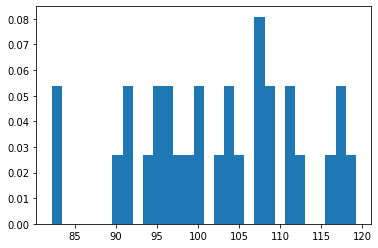

In [19]:
np.random.seed(542)
N = 30 # número de mediciones
t_medio = (120+40)/2
t_atencion_hombre = np.ones(N)*t_medio + np.random.rand(N)*40

plt.hist(t_atencion_hombre,bins = 30,density=True)
plt.show()

## Supuestos en simulación
Clasificación de clientes: 
- Mujer  = 1 $\longrightarrow$ aleatorio < 0.5
- Hombre = 0 $\longrightarrow$ aleatorio $\geq$ 0.5.

Condiciones iniciales:
- Tiempo de simulación: 6:30 am - 1:30pm $\longrightarrow$ T = 7 horas = 25200 seg.
- Tiempo de llegada hasta ser atendido: Min=5seg, Max=30seg.
- Tiempo que tardan los clientes en ser atendidos:
    - Mujer: Min = 1 min= 60seg, Max = 5 min = 300 seg
    - Hombre: Min = 40 seg, Max = 2 min= 120 seg
- Consumo según el tipo de cliente:
    - Mujer: Min = 30 pesos, Max = 100 pesos
    - Hombre: Min = 20 pesos, Max = 80 pesos


In [61]:
################## Programa realizado en clase de forma conjunta  de forma ineficiente
d = 5
T =25200
T_at_min = 5; T_at_max = 30
T_mujer_min =60; T_mujer_max = 300
T_hombre_min = 40; T_hombre_max = 120
C_mujer_min = 30; C_mujer_max = 100
C_hombre_min = 20; C_hombre_max = 80

Personas = np.random.rand(300)
# Listas
T_atencion = []

Can_mujeres = []
Can_hombres = []

Ganancias = []
P_atendidas = []
Consu_h = []
Consu_m = []
# ciclo de los días
for j in range(d):
    t_atencion = 0 # Tiempo de atención 
    i = 0 # Personas
    N_mujeres = 0 # número de mujeres
    N_hombres = 0 # número de hombres
    c_hombre = 0  # consumo total hombre
    c_mujer = 0  # consumo total mujer
    
    
    # Día de trabajo 
    while t_atencion <= T:
        t_llegada = np.random.uniform(T_at_min,T_at_max)
        t_atencion += t_llegada
        if Personas[i]<0.5:
            t_persona = np.random.uniform(T_mujer_min,T_mujer_max)
            t_atencion += t_persona
            N_mujeres += 1
            c_mujer += np.random.uniform(C_mujer_min,C_mujer_max)
        else:
            t_persona = np.random.uniform(T_hombre_min,T_hombre_max)
            t_atencion += t_persona
            N_hombres += 1
            c_hombre += np.random.uniform(C_hombre_min,C_hombre_max)
        
        i += 1
        T_atencion.append(t_persona)

    Can_mujeres.append(N_mujeres)
    Can_hombres.append(N_hombres)

    Ganancias.append((c_hombre+c_mujer)*0.6)
    P_atendidas.append(i)
    Consu_h.append(c_hombre)
    Consu_m.append(c_mujer)
        
# print('Los gastos de hombres en los 5 días fueron:',Consu_h)
# print('En promedio los hombres gastaron:',np.mean(Consu_h))
# print('Los gastos de mujeres en los 5 días fueron:',Consu_m)
# print('En promedio los mujeres gastaron:',np.mean(Consu_m))
print('El número de personas atendidas fueron:',np.mean(P_atendidas))
# print('En promedio la cantidad de personas atendidas fueron:',np.mean(P_atendidas))
# print('El tiempo de atención total fue:',T_atencion)
# print('El tiempo de atención promedio fue:',np.mean(T_atencion))
# print('Los ingresos totales fueron:',Ganancias)
# print('La rentabilidad fue de:',np.array(Ganancias)*.6)
# print('La rentabilidad promedio fue:',np.mean(np.array(G_total)*.6))
# print('El atención promedio por persona fue:',np.mean(T_atencionPersonas)/60)

Los ingresos totales fueron: [433264.598086127, 418011.21485483844, 410302.32893752103, 441328.2695133706, 471097.2583957135]
La rentabilidad fue de: [259958.75885168 250806.7289129  246181.39736251 264796.96170802
 282658.35503743]


## Programación funcional y vectorizada

In [20]:
# Definición de la función que simula la cafetería del ITESO
def SimCafeteria(Personas,T):
    # Información suministrada por la cafetería del ITESO
#     T = 25200
    Tat_min = 5; Tat_max=30
    Tmujer_min = 60; Tmujer_max = 150
    Thombre_min = 40; Thombre_max = 120
    Gmujer_min = 30; Gmujer_max = 100
    Ghombre_min = 20; Ghombre_max=80
    
    # Inicialización de variables usadas para almacenar información solicitada
    t_atencion = 0 # Tiempo de atención 
    i = 0 # Personas
    N_mujeres = 0 # número de mujeres
    N_hombres = 0 # número de hombres
    c_hombre = 0  # consumo total hombre
    c_mujer = 0  # consumo total mujer
    T_atencion = []   
    
    # Día de trabajo 
    while t_atencion <= T:
        t_llegada = np.random.uniform(T_at_min,T_at_max)
        t_atencion += t_llegada
        if Personas[i]<0.5:
            t_persona = np.random.uniform(T_mujer_min,T_mujer_max)
            t_atencion += t_persona
            N_mujeres += 1
            c_mujer += np.random.uniform(C_mujer_min,C_mujer_max)
        else:
            t_persona = np.random.uniform(T_hombre_min,T_hombre_max)
            t_atencion += t_persona
            N_hombres += 1
            c_hombre += np.random.uniform(C_hombre_min,C_hombre_max)
        
        i += 1
        T_atencion.append(t_persona)
    
    return np.array([N_mujeres,N_hombres,(c_hombre+c_mujer)*0.6,
                    i,c_hombre,c_mujer])

In [ ]:
T = 25200
dias = 5000
Personas = np.random.rand(T)

##################### Como llamar una función varias veces

# Correr la función usando compresión de listas
e1 = [SimCafeteria(Personas,T) for i in range(dias)]
e1 = np.array(e1) # Lo convierto a una matriz

# Correr la función usando la función map
e2 = list(map(lambda x:SimCafeteria(Personas,T),range(dias)))
e2 = np.array(e2)
np.mean(e2[:,3])

# Su trabajo es graficar ya sea e1 o e2 y que arrojen unas gráficas como las que están al final

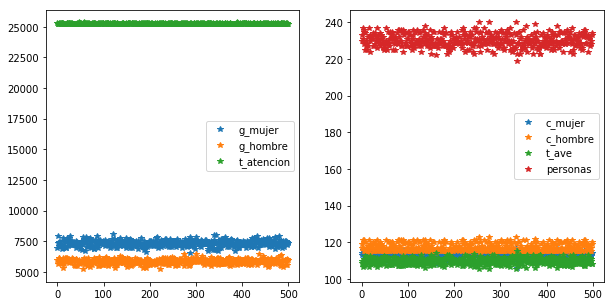

El número de personas atendidas fueron: 230.176


In [74]:
# Correr la función la cantidad de veces necesarias
T = 25200
dias = 500
Personas = np.random.rand(T)

# Correr la función usando compresión de listas

# Correr la función usando la función map

# Graficar
fig,(ax1,ax2) = plt.subplots(1,2)
fig.set_figwidth(10)
fig.set_figheight(5)

plt.show()
# # print(e[:,-1])
# # print('Los gastos de hombres en los 5 días fueron:',e[:,1])
# # print('En promedio los hombres gastaron:',np.mean(e[:,1]))
# # print('Los gastos de mujeres en los 5 días fueron:',e[:,0])
# # print('En promedio los mujeres gastaron:',np.mean(e[:,0]))
# print('El número de personas atendidas fueron:',np.mean(e[:,-1]))

># Tarea 4
> ## En canvas subiré los ejercicios que que deben de entregarme junto con el enlace para la entrega de dicha tarea.
>* La solución a esta tarea se debe realizar en un notebook de jupyter, utilizando la sintaxis markdown y además se > deben de reportar el código de cómo obtuvieron los resultados de simulación y con estos resultados responder a las > preguntas dadas.
>* La fecha de entrega de esta tarea es **25/02/2020** hasta las 6 pm y se debe de entregar a través de Canvas. 
> Recuerden después de las 11:59 pm del martes se deshabilita en canvas la entrega de la tarea, así que considérenlo para que no vayan a tener inconvenientes. Recuerden lo acordado el primer día de clase.